In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Lendo a base de dados
df_vendas = pd.read_excel('/content/drive/MyDrive/IMERSIVO PANDAS/Datasets/Vendas.xlsx')
df_produtos = pd.read_excel('/content/drive/MyDrive/IMERSIVO PANDAS/Datasets/Produtos.xlsx')

In [3]:
df_vendas.head()

,Data Venda,Data Envio,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda
0,2017-04-01,2017-04-14,66,10729,20070401621728,13.1,25.69,1,NaN,25.69
1,2017-04-01,2017-04-14,66,16059,20070401427058,13.1,25.69,1,NaN,25.69
2,2017-04-01,2017-04-14,66,1969,20070401212968,13.1,25.69,1,NaN,25.69
3,2017-04-01,2017-04-14,66,9289,20070401320288,13.1,25.69,1,NaN,25.69
4,2017-04-01,2017-04-14,66,15719,20070401426718,13.1,25.69,1,NaN,25.69


In [4]:
df_produtos.head()

,ID Produto,ID Subcategoria,Produto,Marca,Subcategoria,Categoria
0,412,15,Proseware Laptop12 M210 White,Proseware,Laptops,Computers
1,642,20,Proseware Photo Ink Jet Printer M100 Black,Proseware,"Printers, Scanners & Fax",Computers
2,673,20,Proseware Laser Jet Printer E100 Grey,Proseware,"Printers, Scanners & Fax",Computers
3,691,20,Proseware Slim-Design Fax Machine with Answeri...,Proseware,"Printers, Scanners & Fax",Computers
4,672,20,Proseware Ink Jet All in one M300 Grey,Proseware,"Printers, Scanners & Fax",Computers


In [5]:
# Queremos levar pra tabela de vendas as informações de cada produto, presentes em df_produto
# Para isso, usaremos LEFT JOIN para fazer um merge no pandas
df = pd.merge(df_vendas, df_produtos, how='left', on='ID Produto') # on_left, on_right para chaves com nomes diferentes

In [6]:
df.sample(5)

,Data Venda,Data Envio,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,ID Subcategoria,Produto,Marca,Subcategoria,Categoria
7503,2018-05-18,2018-05-26,636,19054,200805183CS588,459.40,999.00,24,NaN,23976.000,19,WWI Projector 720p DLP56 Silver,Wide World Importers,Projectors & Screens,Computers
66724,2017-09-08,2017-09-18,66,18436,20070908429435,13.10,25.69,1,2.569,23.121,6,NT Bluetooth Stereo Headphones E52 Blue,Northwind Traders,Bluetooth Headphones,Audio
45911,2019-01-29,2019-02-11,323,18909,200901292CS817,169.69,369.00,5,92.250,1752.750,13,SV Car Video LCD7 M7003 Silver,Southridge Video,Car Video,TV and Video
30202,2017-02-03,2017-02-16,500,19079,200702033CS425,22.86,69.00,2,27.600,110.400,18,Adventure Works CRT19 E10 Black,Adventure Works,Monitors,Computers
69970,2017-12-28,2018-01-09,66,12638,20071228723637,13.10,25.69,1,5.138,20.552,6,NT Bluetooth Stereo Headphones E52 Blue,Northwind Traders,Bluetooth Headphones,Audio


In [7]:
# Receita total
receita = df['Valor Venda'].sum()

In [8]:
# CUsto total
# Antes precisamos criar uma tabela "custo da venda"
df['Custo da venda'] = df["Custo Unitário"] * df['Quantidade']

In [9]:
# Custo total
custo = df['Custo da venda'].sum()

In [10]:
# Lucro total
lucro = receita - custo
lucro

89132510.31099999

In [11]:
# Agora vamos criar uma coluna para lucro
df['Lucro'] = df['Valor Venda'] - df['Custo da venda']

In [12]:
df.sample(5)

,Data Venda,Data Envio,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,ID Subcategoria,Produto,Marca,Subcategoria,Categoria,Custo da venda,Lucro
19361,2018-05-25,2018-06-02,579,19054,200805253CS588,116.75,229.00,6,NaN,1374.000,19,Contoso Projector 480p M480 Black,Contoso,Projectors & Screens,Computers,700.50,673.500
68506,2017-04-12,2017-04-25,66,8629,20070412819628,13.10,25.69,1,5.138,20.552,6,NT Bluetooth Stereo Headphones E52 Blue,Northwind Traders,Bluetooth Headphones,Audio,13.10,7.452
40996,2017-11-05,2017-11-16,541,19047,200711053CS529,321.44,699.00,8,1118.400,4473.600,19,Proseware Projector 720p LCD56 Black,Proseware,Projectors & Screens,Computers,2571.52,1902.080
56009,2017-03-03,2017-03-14,176,19037,200703031CS427,58.36,126.90,1,8.883,118.017,10,SV 16xDVD M360 Black,Southridge Video,VCD & DVD,TV and Video,58.36,59.657
22045,2017-11-06,2017-11-14,692,18824,200711063CS579,82.17,248.00,9,446.400,1785.600,20,Proseware High-Performance Business-Class Lase...,Proseware,"Printers, Scanners & Fax",Computers,739.53,1046.070


In [13]:
# Adicionando uma coluna informando o local
df.insert(2, 'teste', df['Valor Venda'] - df['Custo da venda'])

In [14]:
# Apagando a coluna
df.drop(columns=["teste"], inplace=True) # apaga em memoria

In [15]:
# Quero renomear uma coluna
df.rename(columns={
    'Lucro' : 'Lucro Venda', # passamos um dicionario de informações NOME_ANTIGO: NOVO_NOME
},inplace=True)

# Valores faltando(nan)

In [16]:
# numero de falores ausentes por coluna
df.isnull().sum()

Data Venda             0
Data Envio             0
ID Produto             0
ID Cliente             0
No. Venda              0
Custo Unitário         0
Preço Unitário         0
Quantidade             0
Valor Desconto     20244
Valor Venda            0
ID Subcategoria        0
Produto                0
Marca                  0
Subcategoria           0
Categoria              0
Custo da venda         0
Lucro Venda            0
dtype: int64

In [17]:
# No caso desse data frame, podemos substituir o NAN por 0, pois ele é mostrado quando nao tem nenhum desconto
df['Valor Desconto'].fillna(0, inplace=True)

In [18]:
df.sample(5)

,Data Venda,Data Envio,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,ID Subcategoria,Produto,Marca,Subcategoria,Categoria,Custo da venda,Lucro Venda
35060,2017-09-09,2017-09-16,413,19043,200709093CS498,275.46,599.00,10,599.000,5391.000,15,Proseware Laptop16 M610 White,Proseware,Laptops,Computers,2754.60,2636.400
66177,2017-08-13,2017-08-18,66,8061,20070813819060,13.10,25.69,1,2.569,23.121,6,NT Bluetooth Stereo Headphones E52 Blue,Northwind Traders,Bluetooth Headphones,Audio,13.10,10.021
46798,2018-09-07,2018-09-12,644,19061,200809073CS736,40.28,79.00,5,39.500,355.500,20,Proseware Laser Jet Printer E100 Black,Proseware,"Printers, Scanners & Fax",Computers,201.40,154.100
28043,2019-02-03,2019-02-12,253,19115,200902032CS697,152.44,299.00,11,657.800,2631.200,11,Contoso Home Theater System 2.1 Channel E1200 ...,Contoso,Home Theater System,TV and Video,1676.84,954.360
20820,2018-01-26,2018-02-06,551,19097,200801263CS558,760.38,2295.00,7,249.750,13655.250,19,Proseware Projector 1080p LCD86 White,Proseware,Projectors & Screens,Computers,5322.66,8332.590


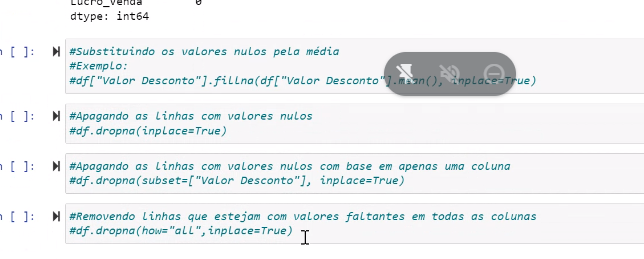

In [19]:
df.sample(5)

,Data Venda,Data Envio,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,ID Subcategoria,Produto,Marca,Subcategoria,Categoria,Custo da venda,Lucro Venda
64140,2017-02-25,2017-03-09,66,7438,20070225318437,13.10,25.69,1,1.2845,24.4055,6,NT Bluetooth Stereo Headphones E52 Blue,Northwind Traders,Bluetooth Headphones,Audio,13.10,11.3055
48611,2018-09-30,2018-10-11,181,19057,200809302CS636,59.32,129.00,5,64.5000,580.5000,10,SV 16xDVD M310 Silver,Southridge Video,VCD & DVD,TV and Video,296.60,283.9000
33658,2018-03-12,2018-03-25,460,19049,200803123CS555,152.90,299.90,30,629.7900,8367.2100,17,WWI Desktop PC1.80 E1802 White,Wide World Importers,Desktops,Computers,4587.00,3780.2100
13419,2017-06-23,2017-06-28,490,19041,200706233CS489,287.92,869.00,6,0.0000,5214.0000,18,Adventure Works LCD24W X300 Black,Adventure Works,Monitors,Computers,1727.52,3486.4800
50315,2018-09-26,2018-10-07,650,18907,200809263CS815,39.77,78.00,6,46.8000,421.2000,20,Proseware Ink Jet Fax Machine E100 Black,Proseware,"Printers, Scanners & Fax",Computers,238.62,182.5800


# Visualização de dados


In [20]:
# Criando uma coluna com o total de dias pra enviar o produto
df["Dias Para Enviar"] = (df["Data Envio"] - df["Data Venda"]).dt.days

In [21]:
df.sample(5)

,Data Venda,Data Envio,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,ID Subcategoria,Produto,Marca,Subcategoria,Categoria,Custo da venda,Lucro Venda,Dias Para Enviar
26943,2018-11-20,2018-11-30,122,18876,200811202CS707,128.76,279.99,16,895.968,3583.872,9,"Adventure Works 19"" Portable LCD HDTV M110 Silver",Adventure Works,Televisions,TV and Video,2060.16,1523.712,10
2877,2017-07-20,2017-08-01,66,9558,20070720720557,13.10,25.69,1,0.000,25.690,6,NT Bluetooth Stereo Headphones E52 Blue,Northwind Traders,Bluetooth Headphones,Audio,13.10,12.590,12
31526,2018-11-08,2018-11-20,210,19108,200811082CS648,152.44,299.00,17,762.450,4320.550,11,Litware Home Theater System 2.1 Channel E210 S...,Litware,Home Theater System,TV and Video,2591.48,1729.070,12
40814,2017-08-21,2017-08-27,554,18792,200708213CS470,459.40,999.00,8,799.200,7192.800,19,Proseware Projector 720p DLP56 White,Proseware,Projectors & Screens,Computers,3675.20,3517.600,6
32236,2017-03-05,2017-03-09,458,19080,200703053CS468,117.21,229.90,20,919.600,3678.400,17,WWI Desktop PC1.80 E1800 White,Wide World Importers,Desktops,Computers,2344.20,1334.200,4


In [22]:
# Media tempo envio por marca
df.groupby("Marca")["Dias Para Enviar"].mean()

Marca
Adventure Works         8.312235
Contoso                 8.607544
Fabrikam                8.144103
Litware                 8.325130
Northwind Traders       9.069631
Proseware               8.263903
Southridge Video        8.382667
Wide World Importers    8.316118
Name: Dias Para Enviar, dtype: float64

In [23]:
# Lucro por marca
df.groupby("Marca")["Lucro Venda"].sum().sort_values(ascending=False)

Marca
Adventure Works         2.278162e+07
Proseware               2.053851e+07
Wide World Importers    1.669242e+07
Contoso                 1.341681e+07
Southridge Video        6.547178e+06
Fabrikam                5.130530e+06
Litware                 3.613602e+06
Northwind Traders       4.118473e+05
Name: Lucro Venda, dtype: float64

In [24]:
# Ajudtando exibição dos numeros
pd.options.display.float_format = '{:20,.2f}'.format

In [25]:
# Total de produtos vendidos
#pd.set_option("display.max_rows", None) # Faz com que mostre todas as colunas
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False).reset_index()

,Produto,Quantidade
0,NT Bluetooth Stereo Headphones E52 Blue,14172
1,Contoso 4G MP3 Player E400 Silver,5538
2,Adventure Works Desktop PC1.80 ED182 White,3282
3,Adventure Works Desktop PC3.0 MS300 Silver,3027
4,Adventure Works Desktop PC1.80 ED180 White,2974
...,...,...
651,WWI Desktop PC2.33 X2330 White,6
652,Contoso Projector 1080p X981 Black,6
653,WWI Desktop PC2.33 X2330 Silver,4
654,WWI Desktop PC2.33 X2330 Brown,3


Text(0, 0.5, 'Marca')

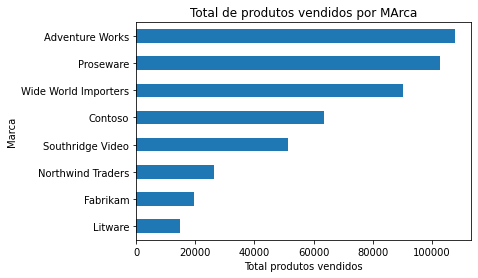

In [26]:
# QUero um grafico total de produtos vendidos por marca
df.groupby("Marca")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title='Total de produtos vendidos por MArca')
plt.xlabel('Total produtos vendidos')
plt.ylabel('Marca')

In [27]:
# Criando o memso grafico no plotly
dados = df.groupby("Marca")["Quantidade"].sum().sort_values(ascending=False).reset_index() # Tem qe ter o reset_index pra criar um data frame para ser interpretado pela biblioteca


In [28]:
dados


,Marca,Quantidade
0,Adventure Works,107969
1,Proseware,102933
2,Wide World Importers,90192
3,Contoso,63590
4,Southridge Video,51197
5,Northwind Traders,26420
6,Fabrikam,19612
7,Litware,14632


In [29]:
figura = px.bar(dados, x ='Marca', y = 'Quantidade', title="Quantidade de produtos vendidos por marca", 
                text="Quantidade") # text é o que vai aparecer em cada barra
figura.show();

In [30]:
# Grafico lucro por ano
dados = df.groupby(df['Data Venda'].dt.year)["Lucro Venda"].sum().reset_index()
fig = px.bar(dados, x = 'Data Venda', y = 'Lucro Venda')
fig.show()

In [31]:
# Criando uma coluna mes_ano
df['Mes Ano'] = df['Data Venda'].dt.to_period('M').astype(str) # Pega na frequencia mes 1, mes2, ... mes12
# Temos que mudar pra str pois o grafico nao sabe intepretar valores period

In [32]:
dados = df.groupby("Mes Ano")["Lucro Venda"].sum().reset_index()
dados

,Mes Ano,Lucro Venda
0,2017-01,"1,441,071.79"
1,2017-02,"2,534,220.90"
2,2017-03,"1,731,617.12"
3,2017-04,"2,759,490.81"
4,2017-05,"3,678,780.14"
5,2017-06,"3,452,328.60"
6,2017-07,"3,827,039.96"
7,2017-08,"2,860,252.34"
8,2017-09,"4,152,802.88"
9,2017-10,"2,742,296.23"


In [33]:
fig = px.line(dados, x = 'Mes Ano', y = 'Lucro Venda', title='lucro por mes', 
              labels={'Lucro Venda' : 'Lucro'},
              width=900,
              height=500)
fig.show();

In [34]:
# Adicionando marcadores
fig = px.line(dados, x = 'Mes Ano', y = 'Lucro Venda', title='lucro por mes', 
              labels={'Lucro Venda' : 'Lucro'},
              width=900,
              height=500,
              markers=True)
fig.show();

In [35]:
df.sample(5)

,Data Venda,Data Envio,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,ID Subcategoria,Produto,Marca,Subcategoria,Categoria,Custo da venda,Lucro Venda,Dias Para Enviar,Mes Ano
23844,2017-11-24,2017-12-03,320,19045,200711242CS506,321.44,699.00,14,"1,957.20","7,828.80",13,SV Car Video LCD7W M7082 Silver,Southridge Video,Car Video,TV and Video,"4,500.16","3,328.64",9,2017-11
46034,2019-02-09,2019-02-20,622,18937,200902093CS846,760.38,"2,295.00",5,573.75,"10,901.25",19,WWI Projector 1080p LCD86 White,Wide World Importers,Projectors & Screens,Computers,"3,801.90","7,099.35",11,2019-02
5287,2017-10-25,2017-11-07,8,11049,20071025422048,30.58,59.99,1,0.00,59.99,1,Contoso 4G MP3 Player E400 Silver,Contoso,MP4&MP3,Audio,30.58,29.41,13,2017-10
64014,2017-02-19,2017-03-01,66,6266,20070219317265,13.10,25.69,1,1.28,24.41,6,NT Bluetooth Stereo Headphones E52 Blue,Northwind Traders,Bluetooth Headphones,Audio,13.10,11.31,10,2017-02
48060,2018-02-03,2018-02-14,591,19097,200802033CS558,116.75,229.00,5,229.00,916.00,19,Contoso Projector 480p M480 White,Contoso,Projectors & Screens,Computers,583.75,332.25,11,2018-02


In [36]:
# Identificando a categoria
# Precisamos fazer um groupy que agrupe por mais de uma info
Lucro_mes_categoria = df.groupby(["Mes Ano", "Categoria"])[["Lucro Venda", "Quantidade"]].sum().reset_index()
Lucro_mes_categoria

,Mes Ano,Categoria,Lucro Venda,Quantidade
0,2017-01,Audio,"36,607.17",2702
1,2017-01,Computers,"1,250,492.76",5673
2,2017-01,TV and Video,"153,971.86",1550
3,2017-02,Audio,"47,093.70",2295
4,2017-02,Computers,"2,340,849.24",8806
...,...,...,...,...
76,2019-02,Computers,"2,461,121.57",12576
77,2019-02,TV and Video,"1,300,263.98",8325
78,2019-03,Audio,"76,150.78",1758
79,2019-03,Computers,"1,000,417.10",6731


In [37]:
Lucro_mes_categoria = df.groupby(["Mes Ano", "Categoria"])["Lucro Venda"].sum().reset_index()
Lucro_mes_categoria

,Mes Ano,Categoria,Lucro Venda
0,2017-01,Audio,"36,607.17"
1,2017-01,Computers,"1,250,492.76"
2,2017-01,TV and Video,"153,971.86"
3,2017-02,Audio,"47,093.70"
4,2017-02,Computers,"2,340,849.24"
...,...,...,...
76,2019-02,Computers,"2,461,121.57"
77,2019-02,TV and Video,"1,300,263.98"
78,2019-03,Audio,"76,150.78"
79,2019-03,Computers,"1,000,417.10"


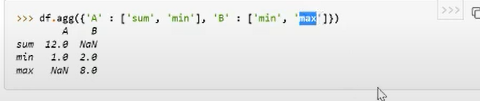

In [38]:
fig = px.line(Lucro_mes_categoria, x = 'Mes Ano', y = 'Lucro Venda', title='lucro por mes por categoria', 
              markers=True,
              color="Categoria") # a nova forma de agrupar var dividir o grafioco  em 3 graficos
fig.show();

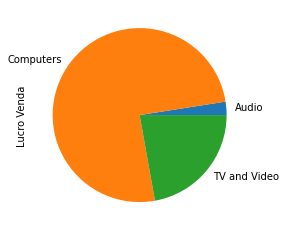

In [39]:
# Lucro por categoria eno grafio pizza
df.groupby("Categoria")["Lucro Venda"].sum().plot.pie()


In [40]:
# Mesmo grafico em plotly
dados = df.groupby("Categoria")["Lucro Venda"].sum().reset_index()
fig = px.pie(dados, values="Lucro Venda", names="Categoria", title="lucro por categoria")
fig.show()

In [41]:
# Criando uma coluna com base em uma condição
df["Avaliação Venda"] = np.where(df["Valor Venda"]> 2000, "Alto Valor", "Baixo Valor") # É um if, vai retornar o da esquerda se sim
df.sample(10)

,Data Venda,Data Envio,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,ID Subcategoria,Produto,Marca,Subcategoria,Categoria,Custo da venda,Lucro Venda,Dias Para Enviar,Mes Ano,Avaliação Venda
2532,2017-07-02,2017-07-13,66,3127,20070702714126,13.10,25.69,1,0.00,25.69,6,NT Bluetooth Stereo Headphones E52 Blue,Northwind Traders,Bluetooth Headphones,Audio,13.10,12.59,11,2017-07,Baixo Valor
36319,2018-12-17,2018-12-23,598,19062,200812173CS737,55.57,109.00,10,218.00,872.00,19,Contoso Screen 80in E080 White,Contoso,Projectors & Screens,Computers,555.70,316.30,6,2018-12,Baixo Valor
51307,2019-03-01,2019-03-12,348,19117,200903013CS706,348.58,758.00,6,99.60,"3,638.40",15,Fabrikam Laptop15.4W M5480 White,Fabrikam,Laptops,Computers,"2,091.48","1,546.92",11,2019-03,Alto Valor
4032,2017-04-10,2017-04-20,8,15266,20070410726265,30.58,59.99,1,0.00,59.99,1,Contoso 4G MP3 Player E400 Silver,Contoso,MP4&MP3,Audio,30.58,29.41,10,2017-04,Baixo Valor
8844,2017-10-08,2017-10-20,523,19088,200710083CS510,70.87,139.00,4,0.00,556.00,18,WWI LCD19 E107 Black,Wide World Importers,Monitors,Computers,283.48,272.52,12,2017-10,Baixo Valor
850,2017-05-04,2017-05-08,66,12760,20070504223759,13.10,25.69,1,0.00,25.69,6,NT Bluetooth Stereo Headphones E52 Blue,Northwind Traders,Bluetooth Headphones,Audio,13.10,12.59,4,2017-05,Baixo Valor
69851,2017-12-21,2018-01-01,66,6397,20071221717396,13.10,25.69,1,5.14,20.55,6,NT Bluetooth Stereo Headphones E52 Blue,Northwind Traders,Bluetooth Headphones,Audio,13.10,7.45,11,2017-12,Baixo Valor
49718,2018-04-13,2018-04-20,574,19053,200804133CS586,55.57,109.00,6,45.78,608.22,19,Proseware Screen 80in E1010 Silver,Proseware,Projectors & Screens,Computers,333.42,274.80,7,2018-04,Baixo Valor
47990,2018-02-22,2018-03-01,524,19094,200802223CS549,82.32,179.00,5,179.00,716.00,18,WWI LCD19W M100 Black,Wide World Importers,Monitors,Computers,411.60,304.40,7,2018-02,Baixo Valor
8551,2017-05-27,2017-05-31,536,19040,200705273CS449,50.47,99.00,5,0.00,495.00,18,WWI LCD17 E205 White,Wide World Importers,Monitors,Computers,252.35,242.65,4,2017-05,Baixo Valor


In [42]:
# Obtendo informações estatisticas do data frame
df.describe()

,ID Produto,ID Cliente,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,ID Subcategoria,Custo da venda,Lucro Venda,Dias Para Enviar
count,"70,055.00","70,055.00","70,055.00","70,055.00","70,055.00","70,055.00","70,055.00","70,055.00","70,055.00","70,055.00","70,055.00"
mean,299.31,"16,412.52",131.53,304.28,6.80,216.02,"2,446.33",11.89,"1,174.01","1,272.32",8.52
std,223.79,"5,188.61",143.84,392.21,6.63,511.12,"4,043.32",6.14,"1,759.03","2,368.16",3.19
min,1.00,6.00,6.62,12.99,1.00,0.00,12.99,1.00,6.62,6.37,4.00
25%,66.00,"17,888.00",30.58,59.99,1.00,0.00,59.99,6.00,30.58,29.41,5.00
50%,299.00,"19,040.00",75.54,179.00,6.00,12.00,"1,034.55",13.00,511.36,476.70,9.00
75%,500.00,"19,079.00",195.24,383.00,9.00,199.95,"3,072.66",18.00,"1,607.20","1,474.34",11.00
max,699.00,"19,145.00",827.97,"2,499.00",118.00,"14,229.00","72,221.10",20.00,"28,150.98","44,883.00",13.00


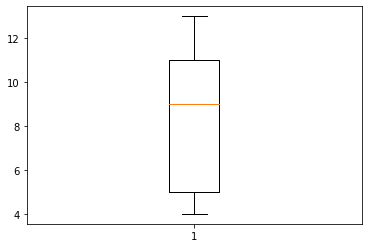

In [43]:
# Para analisar valores discrepantes, usamos grafico boxplot, pois ele deixa claro quais sao os outliers, que sao justamente os valores fora do esperado
fig = plt.boxplot(df["Dias Para Enviar"])

In [44]:
# COm plotly
fig = px.box(df, y = "Dias Para Enviar")
fig.show() # Nao temos outliers nesse exemplo

In [45]:
# Mesmo para custo unitario 
fig = px.box(df, y = "Custo Unitário")
fig.show() # Agora podemos ver os outliers

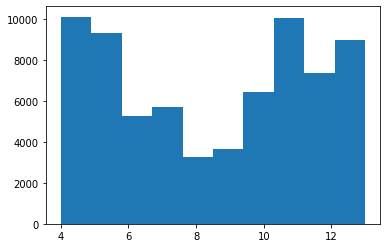

In [46]:
plt.hist(df["Dias Para Enviar"]);

In [47]:
df.head(5)

,Data Venda,Data Envio,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,ID Subcategoria,Produto,Marca,Subcategoria,Categoria,Custo da venda,Lucro Venda,Dias Para Enviar,Mes Ano,Avaliação Venda
0,2017-04-01,2017-04-14,66,10729,20070401621728,13.10,25.69,1,0.00,25.69,6,NT Bluetooth Stereo Headphones E52 Blue,Northwind Traders,Bluetooth Headphones,Audio,13.10,12.59,13,2017-04,Baixo Valor
1,2017-04-01,2017-04-14,66,16059,20070401427058,13.10,25.69,1,0.00,25.69,6,NT Bluetooth Stereo Headphones E52 Blue,Northwind Traders,Bluetooth Headphones,Audio,13.10,12.59,13,2017-04,Baixo Valor
2,2017-04-01,2017-04-14,66,1969,20070401212968,13.10,25.69,1,0.00,25.69,6,NT Bluetooth Stereo Headphones E52 Blue,Northwind Traders,Bluetooth Headphones,Audio,13.10,12.59,13,2017-04,Baixo Valor
3,2017-04-01,2017-04-14,66,9289,20070401320288,13.10,25.69,1,0.00,25.69,6,NT Bluetooth Stereo Headphones E52 Blue,Northwind Traders,Bluetooth Headphones,Audio,13.10,12.59,13,2017-04,Baixo Valor
4,2017-04-01,2017-04-14,66,15719,20070401426718,13.10,25.69,1,0.00,25.69,6,NT Bluetooth Stereo Headphones E52 Blue,Northwind Traders,Bluetooth Headphones,Audio,13.10,12.59,13,2017-04,Baixo Valor


In [48]:
# Estudo variação mensal
MoM = df.groupby("Mes Ano")["Lucro Venda"].sum().reset_index()

In [49]:
# Coluna de lucro do mes anterior
MoM["Mes Anterior"] = MoM["Lucro Venda"].shift(1)

In [50]:
MoM

,Mes Ano,Lucro Venda,Mes Anterior
0,2017-01,"1,441,071.79",NaN
1,2017-02,"2,534,220.90","1,441,071.79"
2,2017-03,"1,731,617.12","2,534,220.90"
3,2017-04,"2,759,490.81","1,731,617.12"
4,2017-05,"3,678,780.14","2,759,490.81"
5,2017-06,"3,452,328.60","3,678,780.14"
6,2017-07,"3,827,039.96","3,452,328.60"
7,2017-08,"2,860,252.34","3,827,039.96"
8,2017-09,"4,152,802.88","2,860,252.34"
9,2017-10,"2,742,296.23","4,152,802.88"


In [51]:
# Coluna de variação de lucro por mes
MoM["Variação"] =  MoM["Lucro Venda"] -  MoM["Mes Anterior"]
MoM

,Mes Ano,Lucro Venda,Mes Anterior,Variação
0,2017-01,"1,441,071.79",NaN,NaN
1,2017-02,"2,534,220.90","1,441,071.79","1,093,149.11"
2,2017-03,"1,731,617.12","2,534,220.90","-802,603.78"
3,2017-04,"2,759,490.81","1,731,617.12","1,027,873.69"
4,2017-05,"3,678,780.14","2,759,490.81","919,289.33"
5,2017-06,"3,452,328.60","3,678,780.14","-226,451.53"
6,2017-07,"3,827,039.96","3,452,328.60","374,711.36"
7,2017-08,"2,860,252.34","3,827,039.96","-966,787.62"
8,2017-09,"4,152,802.88","2,860,252.34","1,292,550.54"
9,2017-10,"2,742,296.23","4,152,802.88","-1,410,506.65"


In [52]:
# Formatação condicional no pandas
MoM.style.highlight_max(subset=["Variação"], color="green")


,Mes Ano,Lucro Venda,Mes Anterior,Variação
0,2017-01,1441071.793500,nan,nan
1,2017-02,2534220.900800,1441071.793500,1093149.107300
2,2017-03,1731617.122600,2534220.900800,-802603.778200
3,2017-04,2759490.808600,1731617.122600,1027873.686000
4,2017-05,3678780.139000,2759490.808600,919289.330400
5,2017-06,3452328.605000,3678780.139000,-226451.534000
6,2017-07,3827039.961000,3452328.605000,374711.356000
7,2017-08,2860252.344000,3827039.961000,-966787.617000
8,2017-09,4152802.884000,2860252.344000,1292550.540000
9,2017-10,2742296.230000,4152802.884000,-1410506.654000


In [53]:
MoM.style.highlight_min(subset=["Variação"], color="red")

,Mes Ano,Lucro Venda,Mes Anterior,Variação
0,2017-01,1441071.793500,nan,nan
1,2017-02,2534220.900800,1441071.793500,1093149.107300
2,2017-03,1731617.122600,2534220.900800,-802603.778200
3,2017-04,2759490.808600,1731617.122600,1027873.686000
4,2017-05,3678780.139000,2759490.808600,919289.330400
5,2017-06,3452328.605000,3678780.139000,-226451.534000
6,2017-07,3827039.961000,3452328.605000,374711.356000
7,2017-08,2860252.344000,3827039.961000,-966787.617000
8,2017-09,4152802.884000,2860252.344000,1292550.540000
9,2017-10,2742296.230000,4152802.884000,-1410506.654000


In [54]:
# paleta de cor
MoM.style.background_gradient(cmap="Oranges")

,Mes Ano,Lucro Venda,Mes Anterior,Variação
0,2017-01,1441071.793500,nan,nan
1,2017-02,2534220.900800,1441071.793500,1093149.107300
2,2017-03,1731617.122600,2534220.900800,-802603.778200
3,2017-04,2759490.808600,1731617.122600,1027873.686000
4,2017-05,3678780.139000,2759490.808600,919289.330400
5,2017-06,3452328.605000,3678780.139000,-226451.534000
6,2017-07,3827039.961000,3452328.605000,374711.356000
7,2017-08,2860252.344000,3827039.961000,-966787.617000
8,2017-09,4152802.884000,2860252.344000,1292550.540000
9,2017-10,2742296.230000,4152802.884000,-1410506.654000


In [55]:
# Mapas com plotly
gp = px.data.gapminder().query("year == 2007")
gp

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.83,31889923,974.58,AFG,4
23,Albania,Europe,2007,76.42,3600523,"5,937.03",ALB,8
35,Algeria,Africa,2007,72.30,33333216,"6,223.37",DZA,12
47,Angola,Africa,2007,42.73,12420476,"4,797.23",AGO,24
59,Argentina,Americas,2007,75.32,40301927,"12,779.38",ARG,32
...,...,...,...,...,...,...,...,...
1655,Vietnam,Asia,2007,74.25,85262356,"2,441.58",VNM,704
1667,West Bank and Gaza,Asia,2007,73.42,4018332,"3,025.35",PSE,275
1679,"Yemen, Rep.",Asia,2007,62.70,22211743,"2,280.77",YEM,887
1691,Zambia,Africa,2007,42.38,11746035,"1,271.21",ZMB,894


In [56]:
fig = px.scatter_geo(gp, locations="iso_alpha",
                     color="continent",
                     hover_name="country",
                     projection="natural earth",
                     size="pop",)
fig.show()

In [58]:
cores = px.colors.qualitative.swatches()
cores.show()

In [61]:
# Adicionando paleta de cores ao grafico
dados = df.groupby("Mes Ano")["Lucro Venda"].sum().reset_index()
fig = px.line(dados, x = 'Mes Ano', y = 'Lucro Venda', title='lucro por mes',
              #color_discrete_sequence=['Black'], 
              color_discrete_sequence = px.colors.qualitative.Set3,
              labels={'Lucro Venda' : 'Lucro'},
              width=900,
              height=500,
              markers=True)
fig.show();

In [63]:
# Alterando o background do grafico
dados = df.groupby("Mes Ano")["Lucro Venda"].sum().reset_index()
fig = px.line(dados, x = 'Mes Ano', y = 'Lucro Venda', title='lucro por mes',
              #color_discrete_sequence=['Black'], 
              color_discrete_sequence = px.colors.qualitative.Set3,
              template='plotly_dark',
              labels={'Lucro Venda' : 'Lucro'},
              width=900,
              height=500,
              markers=True)
fig.show();